<p style="text-align: center;font-size: 40pt">Transformation functions in 2D</p>

In [7]:
%matplotlib widget
# %matplotlib inline

import matplotlib.pyplot as plt

import numpy as np

import ipywidgets as widgets

%run ./scripts/helper_func.py
path = "{0}/lessons/transformations_2d/scripts/helper_func.py".format(get_root_path())
%run $path
path = "{0}/common/scripts/style.py".format(get_root_path())
%run $path

# Overview 

Requirements
- [Coordinate systems in 2D](1-lesson_coordinates.ipynb)

Objectives of this lesson:

- review 2D transformation functions
- understand some geometric quantities and how they change with transformations
- be comfortable in changing between Cartesian and homogeneous coordinates 


Hidden custom latex commands here $ \curvearrowright$

----
[comment]: <> (General commands)
$\newcommand{\textcomma}{\quad\text{,}}$
$\newcommand{\textdot}{\quad\text{.}}$
$\newcommand{\vec}[1]{\overrightarrow{#1}}$
$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\frame}[1]{\mathcal{#1}}$
$\newcommand{\point}[2][]{{}^{#1}\mathbf{#2}}$
$\newcommand{\pointsym}[2][]{{}^{#1}\boldsymbol{#2}}$
$\newcommand{\matsym}[1]{\boldsymbol{#1}}$
$\newcommand{\real}{\mathbb{R}}$
$\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}$
$\newcommand{\F}[2][]{{}_{#2}^{#1}\mathscr{F}}$
$\newcommand{\Fmat}[2][]{{}_{#2}^{#1}\mat{F}}$
$\newcommand{\origin}[2][]{{}_{#2}^{#1}\mat{o}}$
$\newcommand{\T}[2][]{{}_{#2}^{#1}\mat{T}}$
$\newcommand{\t}[2][]{{}_{#2}^{#1}\mat{t}}$
$\newcommand{\R}[2][]{{}_{#2}^{#1}\mat{R}}$
$\newcommand{\f}{\vec{\mathscr{f}}}$
$\newcommand{\ax}[2][]{{}_{#2}^{#1}\vec{\mathscr{x}}}$
$\newcommand{\ay}[2][]{{}_{#2}^{#1}\vec{\mathscr{y}}}$
$\newcommand{\az}[2][]{{}_{#2}^{#1}\vec{\mathscr{z}}}$
$\newcommand{\aw}[2][]{{}_{#2}^{#1}\vec{\mathscr{w}}}$
$\newcommand{\axi}{\mathscr{x}}$
$\newcommand{\ayi}{\mathscr{y}}$
$\newcommand{\azi}{\mathscr{z}}$
$\newcommand{\awi}{\mathscr{w}}$
$\newcommand{\pointx}[2][]{{}^{#1}{#2}_{\axi}}$
$\newcommand{\pointy}[2][]{{}^{#1}{#2}_{\ayi}}$
$\newcommand{\pointz}[2][]{{}^{#1}{#2}_{\azi}}$
$\newcommand{\SO}[1]{\mathrm{SO}(#1)}$
----

A transformation function is nothing else than a simple function in the form of $x' = \mathrm{f}(x)$.
In our case, we will focus on geometric transformation functions that we can apply on sets, such that

\begin{aligned}
\mathcal{P}' = \mathrm{f}(\matsym{\theta}, \mathcal{P}) \quad \text{, using}\\
\forall \point{p} \in \mathcal{P}: \point{p}' = \mathrm{f}( \matsym{\theta}, \point{p}) 
\textcomma
\end{aligned}

where $\matsym{\theta}$ are parameters to the function.

The last equations can be read as
- an English sentence : apply the function $\mathrm{f}(\cdot)$ for all points $\point{p}$ in the set $\mathcal{P}$; or
- a Python code: 
```python
for p in P: 
    p = foo(param, p)
```


# Basic transformations

Before starting on transformation, it worth noting that we can convert a set of points $\mathcal{P}$ expressed in homogeneous coordinates as a matrix by mapping


\begin{aligned}
\mathcal{P} = \{\point{p}_1, \point{p}_2, \cdots, \point{p}_i \}
\mapsto
\mat{P} = 
\bmat{
\point{p}_1 & \point{p}_2 & \cdots & \point{p}_i
}
\textcomma
\end{aligned}

where $\mat{P} \in \real^{3 \times n}$ is a matrix with $n$ points and in which the last row are all set to ones.
This matrix representation of a point cloud will help us to optimize transformation functions and express them as matrix multiplication.

## Translation

Translation in Cartesian coordinates is $\mathcal{P}' = \mathrm{trans}(\mat{t}, \mathcal{P})$, with parameters $\mat{t} \in \real^2$ being

\begin{aligned}
\mat{t} = \bmat{ t_\axi \\ t_\ayi }
\textcomma
\end{aligned}

and the function for each point is defined as 
\begin{aligned}
\point{p}' 
= \mathrm{trans}(\mat{t}, \point{p})
= \bmat{ p_\axi + t_\axi \\ p_\ayi + t_\ayi }
\textdot
\end{aligned}

---

A translation in homogeneous coordinates is 
\begin{aligned}
\mat{P}' 
&= \mathrm{trans}(\matsym{\Theta}_\text{t} \mat{P}) \\
&= \matsym{\Theta}_\text{t} \mat{P} 
\textcomma
\end{aligned}

with the transformation parameters being
\begin{aligned}
\matsym{\Theta}_\text{t} 
&= 
\bmat{
\mat{I} & \mat{t} \\ 
\mat{0}^T & 1
} \\
&=
\bmat{
1 & 0 & t_\axi \\ 
0 & 1 & t_\ayi \\
0 & 0 & 1
}
\textdot
\end{aligned}

Here is an example with a small point cloud with geometric quantities defined in the prior lesson computed before and after the transformation.

|      | before       | after        | equal
|---      |----      |---        |---
|p     |[1. 2.]       | [2.  1.7]    | False
|q     |[1. 1.]       | [2.  0.7]    | False
|lenght of p   | 2.236        | 2.625        | False
|lenght of q   | 1.414        | 2.119        | False
|direction of p   | [0.45 0.89]  | [0.76 0.65]  | False
|direction of q   | [0.71 0.71]  | [0.94 0.33]  | False
|dist p q| 1.000        | 1.000        | True
|theta p q| 0.322        | 0.368        | False
|ratio of lenght p q| 1.581        | 1.239        | False
|area p q r | 0.750        | 0.750        | True


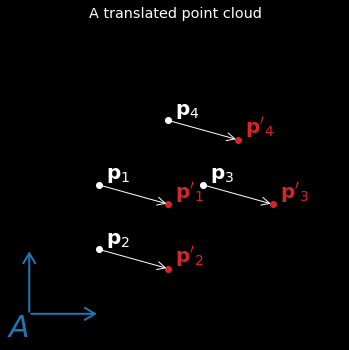

In [8]:
# homogeneous coordinates
P = np.array([[1., 1., 2.5, 2.],
              [2., 1., 2., 3.],
              [1., 1., 1., 1.]])
tx = 1.; ty = -0.3
Theta_t = np.array([[1., 0., tx],
                  [0., 1., ty],
                  [0., 0., 1.]])

P_prime = Theta_t @ P #@ is the matrix multiplication operator in python

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

draw_frame(ax, name="$A$", color = "tab:blue")

for i in np.arange(0,P.shape[1]):
    draw_point(ax, P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))
    draw_point(ax, P_prime[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, 0), color="tab:red")
    draw_vector(ax, P_prime[0:2,i], origin=P[0:2,i], text="")

clean_frame(ax, [P, P_prime], "A translated point cloud")

display_geometric_quantities_2d(P, P_prime)
    

## Rotation

Rotation in Cartesian coordinates is $\mathcal{P}' = \mathrm{rot}(\theta, \mathcal{P})$, with parameters $\theta \in \real$ being the only parameter, and the function for each point $\point{p}$ is defined as 

\begin{aligned}
\point{p}' 
&= \mathrm{rot}(\theta, \point{p}) \\
&= \bmat{ 
p_\axi \cos\theta - p_\ayi \sin\theta \\
p_\axi \sin\theta + p_\ayi\cos\theta
}
\textdot
\end{aligned}

Those equations can be translated in terms of matrix multiplication using 

\begin{aligned}
\mat{P}' = \mat{R} \mat{P}
\textcomma
\end{aligned}

where $\mat{P} \in \real^{2 \times n}$ and $\mat{R} \in \SO{2}$ is defined as 

\begin{aligned}
\mat{R} = 
\bmat{ 
\cos\theta & -\sin\theta \\ 
\sin\theta & \cos\theta \\
}
\textdot
\end{aligned}

For now, we will use the convention that a positive $\theta$ gives an anticlockwise rotation, which is the most common choice of direction.
The motivation for this convention will be explained once we move to 3D.

The matrix $\mat{R}$ is defined as being part of the special orthogonal group 2 (i.e., $\SO{2}$), which enforces some constraints on what kind of number we can put in it.
We will see in details the special orthogonal group in the following lesson.
For now, just recall that __*you cannot*__ expect a rotation matrix by doing 
```python
R = np.random.uniform(size=(2,2)) # no no!
``` 

Rotation matrix $\mat{R}$ are known as an orthogonal matrix, which has the property 
\begin{aligned}
\mat{R}^{-1} = \mat{R}^{T}
\textdot
\end{aligned}

---

A rotation in homogeneous coordinates is $\mat{P}' = \mathrm{rot}(\matsym{\Theta}_\text{r}, \mat{P}) = \matsym{\Theta}_\text{r} \mat{P}$, with 

\begin{aligned}
\matsym{\Theta}_\text{r} = 
\bmat{ 
\mat{R} & \mat{0} \\ 
\mat{0}^T & 1
} =
\bmat{ 
\cos\theta & -\sin\theta & 0 \\ 
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
}
\textdot
\end{aligned}

Note that rotations always happen from the origin of the frame of reference.

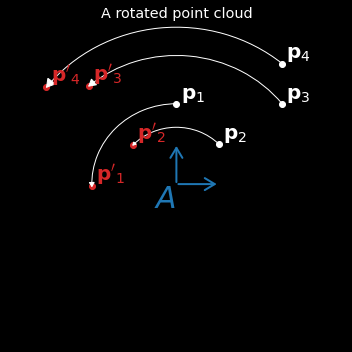

interactive(children=(FloatSlider(value=1.6, description='theta', max=10.0, min=-10.0, step=1.0), Checkbox(val…

In [9]:
# homogeneous coordinates
P = np.array([[0., 1., 2.5, 2.5],
              [2., 1., 2., 3.],
              [1., 1., 1., 1.]])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))



def update(theta=1.6, display=True):
    ax.clear() #not optimal for reactiveness
    Theta = np.array([[np.cos(theta), -np.sin(theta), 0.],
                  [np.sin(theta), np.cos(theta), 0.],
                  [0., 0., 1.]])

    P_prime = Theta @ P #@ is the matrix multiplication operator in python
    for i in np.arange(0,P.shape[1]):
        draw_point(ax, P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))
        draw_point(ax, P_prime[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, 0), color="tab:red")
        draw_angle_vectors(ax, P[0:2,i], v2=P_prime[0:2,i], text="")

    draw_frame(ax, name="$A$", color = "tab:blue")
    clean_frame(ax, [P, P_prime], "A rotated point cloud")
    draw_lim = np.max(P)+1
    ax.set_xlim(-draw_lim, draw_lim)
    ax.set_ylim(-draw_lim, draw_lim)
    
    fig.canvas.draw_idle()
    if(display):
        display_geometric_quantities_2d(P, P_prime)
    return

update(theta=1.6, display=False)
widgets.interact(update, theta = (-10, 10, 1.0), continuous_update=False);


## Scale (non-uniform)

Non-uniform scale in Cartesian coordinates is $\mathcal{P}' = \mathrm{scale}(\matsym{\lambda}, \mathcal{P})$, with parameters $\matsym{\lambda} \in \real^2$, and the function for each point is defined as 

\begin{aligned}
\point{p}' 
= \mathrm{scale}(\matsym{\lambda}, \point{p})
= \bmat{ 
\lambda_\axi p_\axi \\
\lambda_\ayi p_\ayi
}
\textdot
\end{aligned}

In the special case when $\lambda_\axi = \lambda_\ayi$, the scale is called uniform.
The scale equations can be translated in terms of matrix multiplication using $\mat{P}' = \matsym{\Lambda} \mat{P}$, where $\mat{P} \in \real^{2 \times n}$ and $\matsym{\Lambda} = \mat{I}\matsym{\lambda}$ is defined as 

\begin{aligned}
\matsym{\Lambda} = 
\bmat{ 
\lambda_\axi & 0 \\ 
0 & \lambda_\ayi \\
}
\textdot
\end{aligned}

---

A scale in homogeneous coordinates is $\mat{P}' = \mathrm{scale}(\matsym{\Lambda}, \mat{P}) = \matsym{\Lambda} \mat{P}$, with 

\begin{aligned}
\matsym{\Lambda} = 
\bmat{ 
\lambda_\axi & 0 & 0 \\ 
0 & \lambda_\ayi & 0 \\
0 & 0 & 1
}
\textdot
\end{aligned}

In [ ]:
## homogeneous coordinates
P = np.array([[0.5, 0.5, 1.5, 1.5],
              [0.5, 1.5, 1.5, 0.5],
              [1., 1., 1., 1.]])
lamda_x = 2.5; lamda_y = 1.4
Theta = np.array([[lamda_x, 0., 0],
                  [0., lamda_y, 0],
                  [0., 0., 1.]])

P_prime = Theta @ P #@ is the matrix multiplication operator in python

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

draw_frame(ax, name="$A$", color = "tab:blue")

for i in np.arange(0,P.shape[1]):
    draw_point(ax, P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))
    draw_point(ax, P_prime[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, 0), color="tab:red")
    draw_vector(ax, P_prime[0:2,i], origin=P[0:2,i], text="")

clean_frame(ax, [P, P_prime], "A scaled point cloud")
display_geometric_quantities_2d(P, P_prime)

**Side note**: with some specific parameters, scaling can be use for reflection on the $\ax{}$ axis or the $\ay{}$ axis, where scales are constrain to $\lambda_i \in \{-1, 1\}$ (i.e., they take the value of either -1 or 1).
Reflection as a whole is more complicated than that, but not covered in this class.

In [ ]:
## homogeneous coordinates
P = np.array([[0.5, 1., 1.5, 2.],
              [2., 1., 0.3, 3.],
              [1., 1., 1., 1.]])

lamda_x = -1; lamda_y = 1
Theta = np.array([[lamda_x, 0., 0],
                  [0., lamda_y, 0],
                  [0., 0., 1.]])

P_prime = Theta @ P #@ is the matrix multiplication operator in python

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

draw_frame(ax, name="$A$", color = "tab:blue")

for i in np.arange(0,P.shape[1]):
    draw_point(ax, P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))
    draw_point(ax, P_prime[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, 0), color="tab:red")
    draw_vector(ax, P_prime[0:2,i], origin=P[0:2,i], text="")

clean_frame(ax, [P, P_prime], "A reflected point cloud")
display_geometric_quantities_2d(P, P_prime)

## Shear

Shear in Cartesian coordinates is $\mathcal{P}' = \mathrm{shear}(m, \mathcal{P})$, with parameters $m \in \real$, and the function for each point is defined as either

\begin{aligned}
\point{p}' 
&= \mathrm{shear}_\axi(m, \point{p})
= \bmat{ 
 p_\axi + m p_\ayi \\
 p_\ayi
} 
\quad \text{or} \\
&= \mathrm{shear}_\ayi(m, \point{p})
= \bmat{ 
 p_\axi \\
 p_\ayi + m p_\axi
} 
\textdot
\end{aligned}

Those equations can be translated in terms of matrix multiplication using $\mat{P}' = \mat{M} \mat{P}$, where $\mat{P} \in \real^{2 \times n}$ and $\mat{M}$ is defined as either

\begin{aligned}
\mat{M}_\axi 
&= 
\bmat{ 
1 & m \\ 
0 & 1 \\
}
\quad \text{or} \\
\mat{M}_\ayi 
&= 
\bmat{ 
1 & 0 \\ 
m & 1 \\
}
\textdot
\end{aligned}

---

A shear in homogeneous coordinates is $\mat{P}' = \mathrm{shear}(\mat{M}, \mat{P}) = \mat{M} \mat{P}$, with 

\begin{aligned}
\mat{M}_\axi 
&= 
\bmat{ 
1 & m & 0 \\ 
0 & 1 & 0 \\
0 & 0 & 1
}
\quad \text{or} \\
\mat{M}_\ayi 
&= 
\bmat{ 
1 & 0 & 0 \\ 
m & 1 & 0 \\
0 & 0 & 1
}
\textdot
\end{aligned}

Shear transformation has the property of preserving areas.
The parameter $m$ can also be expressed as the shear angle $m=\tan(\theta)$, where $\theta$ formed with the opposite axis.

In [ ]:
## homogeneous coordinates
P = np.array([[0.5, 0.5, 1.5, 1.5],
              [0.5, 1.5, 1.5, 0.5],
              [1., 1., 1., 1.]])
m_x = np.tan(np.pi/3)
M_x = np.array([[1, m_x, 0],
                [0, 1, 0],
                [0, 0, 1]])

P_prime = M_x @ P #@ is the matrix multiplication operator in python
P_prime_y = M_x.T @ P

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

draw_frame(ax, name="$A$", color = "tab:blue")
ax.add_patch(plt.Polygon(P[0:2,:].T, color='white', alpha=0.2))
ax.add_patch(plt.Polygon(P_prime[0:2,:].T, color='tab:red', alpha=0.2))
ax.add_patch(plt.Polygon(P_prime_y[0:2,:].T, color='tab:green', alpha=0.2))

for i in np.arange(0,P.shape[1]):
    draw_point(ax, P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))
    draw_point(ax, P_prime[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, 0), color="tab:red")
    draw_point(ax, P_prime_y[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, 0), color="tab:green")

clean_frame(ax, [P, P_prime], "A sheared point clouds")
display_geometric_quantities_2d(P, P_prime)

## Affine transformation

An affine transformation in Cartesian coordinates is defined as $\mathcal{P}' = \mathrm{affine}(\mat{A}, \mat{b}, \mathcal{P})$, with parameters $\mat{A} \in \real^{2 \times 2}$, $\mat{b} \in \real^{2}$ and the function for each point is defined as 

\begin{aligned}
\point{p}' 
= \mathrm{affine}(\mat{A}, \mat{b}, \point{p})
= \mat{A} \point{p} + \mat{b}
\textdot
\end{aligned}

As opposed to rotations, any scalars can be put in $\mat{A}$, so one could just do
```python
A = np.random.uniform(size=(2,2)) # ah, finally!
``` 
---

An affine transformation in homogeneous coordinates is $\point{p}' = \mat{C} \point{p}$, with

\begin{aligned}
\mat{C} = 
\bmat{ 
\mat{A} & \mat{b} \\ 
\mat{0}^T & 1
}
\textdot
\end{aligned}

In [ ]:
## homogeneous coordinates
P = np.array([[0.5, 0.5, 2.5, 2.5, 2.5],
              [0.5, 2.5, 2.5, 1.5, 0.5],
              [1., 1., 1., 1., 1.]])

A = 2*np.random.uniform(size=(2,2), low=-1*np.ones((2,2))) 
b = np.random.uniform(size=(2,1), low=-1*np.ones((2,1)))
C = np.hstack((A,b))
C = np.vstack((C,[0,0,1]))

P_prime = C @ P #@ is the matrix multiplication operator in python

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

draw_frame(ax, name="$A$", color = "tab:blue")
ax.add_patch(plt.Polygon(P[0:2,:].T, color='white', alpha=0.2))
ax.add_patch(plt.Polygon(P_prime[0:2,:].T, color='tab:red', alpha=0.2))

for i in np.arange(0,P.shape[1]):
    draw_point(ax, P[0:2,i], text="$\mathbf{p}_{" + str(i+1) + "}$", text_offset=(0.1, 0))
    draw_point(ax, P_prime[0:2,i], text="$\mathbf{p}'_{" + str(i+1) + "}$", text_offset=(0.1, 0), color="tab:red")

clean_frame(ax, [P, P_prime], "An affine transformation")
display_geometric_quantities_2d(P, P_prime)

# Inverse transformation

Affine transformations are the general version of all the other basic transformations.
Often, it is interesting to come back to the original point cloud, so the following identity become useful

\begin{aligned}
\mat{P}' &= \mat{C} \mat{P} \\
\mat{C}^{-1} \mat{P}' &= \underbrace{\mat{C}^{-1} \mat{C}}_{\mat{I}} \mat{P} \\
\mat{C}^{-1} \mat{P}' &= \mat{P}
\textdot
\end{aligned}

This equation means that the inverse of an affine matrix $\mat{C}^{-1}$ in homogeneous coordinates will take a transformed point cloud $\mat{P}'$ back to its original location $\mat{P}$.

# Chained transformations

Another property is that all affine transformation, including basic transformation functions (translation, rotation, scale, shear, and affine), **can be chained** in homogeneous coordinates using matrix multiplication.
Chaining affine transformations will produce another valid affine transformation matrix
For example, one that would scale and rotate a point cloud could simply do

\begin{aligned}
\mat{P}' 
&= \matsym{\Theta}_\text{r} \matsym{\Lambda} \mat{P} \\
&= \bmat{ 
\cos\theta & -\sin\theta & 0 \\ 
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1
}
\bmat{ 
\lambda_\axi & 0 & 0 \\ 
0 & \lambda_\ayi & 0 \\
0 & 0 & 1
}
\mat{P} \\
&=
\bmat{ 
\lambda_\axi \cos\theta & -\sin\theta & 0 \\ 
\sin\theta & \lambda_\ayi \cos\theta & 0 \\
0 & 0 & 1
}
\mat{P}
\textdot
\end{aligned}

# Conclusion

You should do the following activities to enhance your understanding of the concepts viewed in this lesson:
- play with the Python scripts provided;
- do the [exercises](../../exercises/ex_transformations_2d/2e-exercises_transformation.ipynb) related to this lesson, they are necessary to connect concepts;
- modify the markdown by adding your own notes using `> my notes`; and
- complete the tables [Symbol definitions](#Symbol-definitions) and [Glossary](#Glossary) and add your own definitions.

Next lesson:
- [Rigid transformation in 2D](3-lesson_rigid.ipynb)

## Symbol definitions

| Symbol                                 | Definition                       |
|--------------------                    |-------------                     |
| $\matsym{\Theta}_\text{t}$, $\mat{t}$  | translation parameters           |
| $\matsym{\Theta}_\text{r}$, $\mat{R}$  | rotations parameters             |
| $\matsym{\Lambda}$, $\matsym{\lambda}$ | scale (and reflexion) parameters |
| $\mat{M}_\axi$, $\mat{M}_\ayi$, $m$    | shear parameters                 |
| $\mat{C}$, $\mat{A}$, $\mat{b}$        | affine parameters                |
| $x$                                    | scalar                           |
| $\vec{x}$                              | vector                           |
| $\point{x}$                            | coordinates of a point           |
| $x_i$                                  | $i^{\text{th}}$ scalar of a set  |
| ...                                    |                                  |

## Glossary

| English             | Français              | Definition |
|-----------          |------------           |------------|
| scale               | dilatation            |            |
| shear               | transvection          |            |
| affine              | transformation affine |            |
| ...                 |                       |            |